# Regressão linear

Vamos considerar o problema de prever a idade de um conjunto de crianças e jovens com idade entre 1 e 20 anos a partir da altura delas

### Leitura dos dados

Text(0, 0.5, 'Idade')

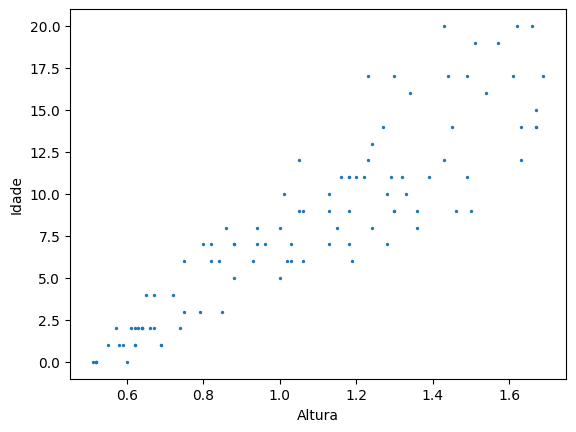

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("age_data_1.txt")
x, y = data.T

plt.scatter(x, y, s=2)
plt.xlabel("Altura")
plt.ylabel("Idade")

### Modelo linear

Vamos definir um modelo linear para representar os dados. Vamos supor que a idade de uma pessoa é dada por

$y_m = ax + b$

onde x é a altura e y a idade.

[0.51       0.53408163 0.55816327 0.5822449  0.60632653 0.63040816
 0.6544898  0.67857143 0.70265306 0.72673469 0.75081633 0.77489796
 0.79897959 0.82306122 0.84714286 0.87122449 0.89530612 0.91938776
 0.94346939 0.96755102 0.99163265 1.01571429 1.03979592 1.06387755
 1.08795918 1.11204082 1.13612245 1.16020408 1.18428571 1.20836735
 1.23244898 1.25653061 1.28061224 1.30469388 1.32877551 1.35285714
 1.37693878 1.40102041 1.42510204 1.44918367 1.47326531 1.49734694
 1.52142857 1.5455102  1.56959184 1.59367347 1.6177551  1.64183673
 1.66591837 1.69      ]
[ 0.12        0.40897959  0.69795918  0.98693878  1.27591837  1.56489796
  1.85387755  2.14285714  2.43183673  2.72081633  3.00979592  3.29877551
  3.5877551   3.87673469  4.16571429  4.45469388  4.74367347  5.03265306
  5.32163265  5.61061224  5.89959184  6.18857143  6.47755102  6.76653061
  7.0555102   7.3444898   7.63346939  7.92244898  8.21142857  8.50040816
  8.78938776  9.07836735  9.36734694  9.65632653  9.94530612 10.23428571
 1

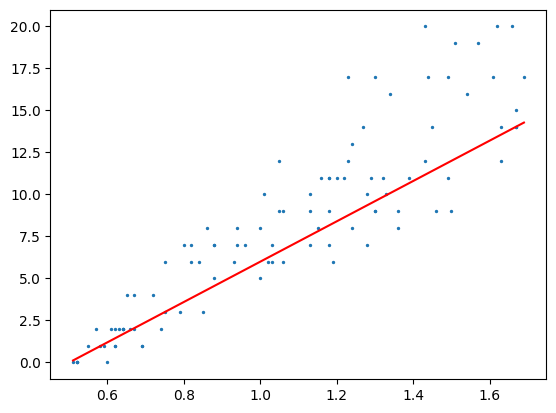

In [4]:
class Model:
    """Modelo linear com parâmetros `a` e `b`."""

    def __init__(self, a, b):

        self.a = a
        self.b = b

    def __call__(self, x):
        y = self.a*x + self.b
        return  y
    
    def copy(self):
        return Model(self.a, self.b)

model = Model(a=12, b=-6)

xm = np.linspace(x.min(), x.max())

print(xm)

ym = model(xm)

print(ym)

plt.scatter(x, y, s=2)
plt.plot(xm, ym, "r")

### Erro quadrático médio

O erro quadrático médio é dado por

$$
mse = \frac{1}{n}\sum_{i=1}^{n}(y(i)-y_m(i))^2
$$

In [5]:
def mse(model, x, y):

    ym = model(x)
    error = np.mean((y-ym)**2)

    return error

error = mse(model, x, y)
print(error)

8.027488


Vamos criar funções para plotar o erro que teríamos se modificássemos os parâmetros do nosso modelo

A vals [11.         11.10526316 11.21052632 11.31578947 11.42105263 11.52631579
 11.63157895 11.73684211 11.84210526 11.94736842 12.05263158 12.15789474
 12.26315789 12.36842105 12.47368421 12.57894737 12.68421053 12.78947368
 12.89473684 13.        ]
B vals [-7.         -6.89473684 -6.78947368 -6.68421053 -6.57894737 -6.47368421
 -6.36842105 -6.26315789 -6.15789474 -6.05263158 -5.94736842 -5.84210526
 -5.73684211 -5.63157895 -5.52631579 -5.42105263 -5.31578947 -5.21052632
 -5.10526316 -5.        ]


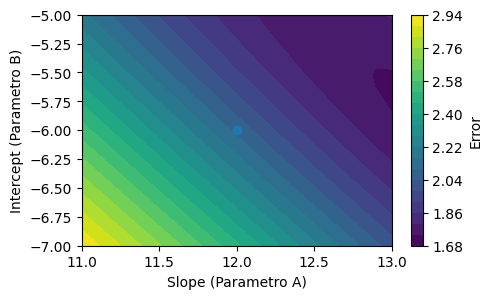

In [24]:
def get_local_error(model, x, y, par_range):
    """Calcula o erro quadrático médio entre `x` e `y` para combinações de 
    parâmetros do modelo no intervalo [a-par_range, a+par_range] e [b-par_range, b+par_range]."""
    
    # Número de pontos
    size = 20
    # Parâmetros do modelo
    a, b = model.a, model.b
    # Possíveis parâmetros do modelo
    a_vals = np.linspace(a-par_range, a+par_range, size)
    print(f"A vals {a_vals}") #Apresenta 20 valores entre o intervalo
    b_vals = np.linspace(b-par_range, b+par_range, size)
    print(f"B vals {b_vals}")

    # Avalia o modelo para cada combinação de parâmetros
    error_grid = np.zeros((size, size))
    for i, b_val in enumerate(b_vals): #parametro B é o que fica fixo conforme x, parametro A é o que modifica com X
        for j, a_val in enumerate(a_vals):
            model_close = Model(a_val, b_val) #modelo com a combinação variando com todos os A para cada B.
            error = mse(model_close, x, y) #avaliando o erro
            error_grid[i,j] = error #guardando o erro na matriz de zeros, ou seja, substituindo.
            
    return error_grid, a_vals, b_vals

def plot_local_error(model, x, y, par_range=1.):
    """Plota o erro quadrático médio para diversos parâmetros do modelo."""
    
    error_grid, a_vals, b_vals = get_local_error(model, x, y, par_range)
    #print(f'Grid de erros sem log {error_grid[0]}')
    #print(f'Grid de erros após aplicar o log nos valores {np.log(error_grid)[0]}')
    plt.figure(figsize=(5,3))
    # A função np.log ajuda a diferenciar valores muito parecidos
    """"
    X, y: esses parâmetros são as coordenadas dos valores em z.
    Z: Este parâmetro é os valores de altura sobre os quais o contorno é desenhado.
    Levels: Este parâmetro é usado para determinar os números e posições das linhas / regiões de contorno.
    """
    plt.contourf(a_vals, b_vals, np.log(error_grid), levels=20) #desenha contornos no grafico sobre os pontos

    cbar = plt.colorbar()
    cbar.set_label("Error")
    plt.scatter(model.a, model.b) #Plot o ponto inicial de parametros
    plt.xlabel("Slope (Parametro A)")
    plt.ylabel("Intercept (Parametro B)")


plot_local_error(model, x, y)

A vals [ 7.          7.52631579  8.05263158  8.57894737  9.10526316  9.63157895
 10.15789474 10.68421053 11.21052632 11.73684211 12.26315789 12.78947368
 13.31578947 13.84210526 14.36842105 14.89473684 15.42105263 15.94736842
 16.47368421 17.        ]
B vals [-11.         -10.47368421  -9.94736842  -9.42105263  -8.89473684
  -8.36842105  -7.84210526  -7.31578947  -6.78947368  -6.26315789
  -5.73684211  -5.21052632  -4.68421053  -4.15789474  -3.63157895
  -3.10526316  -2.57894737  -2.05263158  -1.52631579  -1.        ]


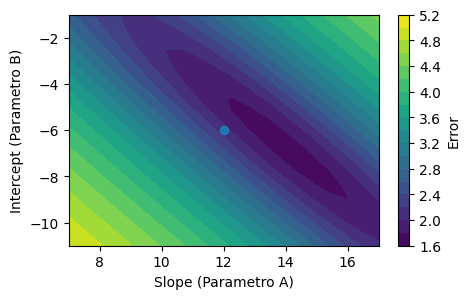

In [25]:
# Visualizando um intervalo maior de parâmetros
plot_local_error(model, x, y, par_range=5)

### Otimização de gradiente descendente

O gradiente do erro quadrático médio é calculado como

$$
\frac{\partial{mse}}{\partial{a}} = -\frac{2}{n}\sum_{i=1}^n (y(i)-ax(i)-b)x(i)
$$
$$
\frac{\partial{mse}}{\partial{b}} = -\frac{2}{n}\sum_{i=1}^n (y(i)-ax(i)-b)
$$

Gradiente A: -3.5049520000000007
Gradiente B: -2.8271999999999995
A vals [11.         11.10526316 11.21052632 11.31578947 11.42105263 11.52631579
 11.63157895 11.73684211 11.84210526 11.94736842 12.05263158 12.15789474
 12.26315789 12.36842105 12.47368421 12.57894737 12.68421053 12.78947368
 12.89473684 13.        ]
B vals [-7.         -6.89473684 -6.78947368 -6.68421053 -6.57894737 -6.47368421
 -6.36842105 -6.26315789 -6.15789474 -6.05263158 -5.94736842 -5.84210526
 -5.73684211 -5.63157895 -5.52631579 -5.42105263 -5.31578947 -5.21052632
 -5.10526316 -5.        ]


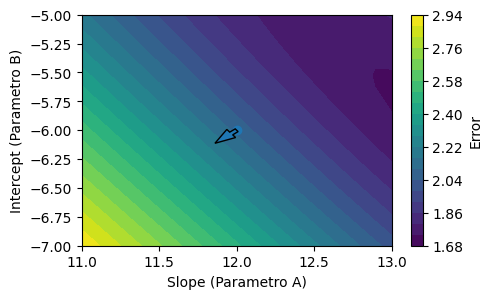

In [26]:
def mse_grad(model, x, y):
    """Gradiente do erro quadrático médio."""

    n = len(x)
    ym = model(x)
    ga = -2*np.sum((y-ym)*x)/n
    gb = -2*np.sum(y-ym)/n

    print(f"Gradiente A: {ga}")
    print(f"Gradiente B: {gb}")
    return ga, gb

grad = mse_grad(model, x, y)

plot_local_error(model, x, y)
# Plota uma seta na direção do gradiente, lr (learning rate) define o comprimento da seta
# em relação ao comprimento original do gradiente
lr = 0.01
plt.arrow(model.a, model.b, lr*grad[0], lr*grad[1], width=0.03)

A vals [11.         11.10526316 11.21052632 11.31578947 11.42105263 11.52631579
 11.63157895 11.73684211 11.84210526 11.94736842 12.05263158 12.15789474
 12.26315789 12.36842105 12.47368421 12.57894737 12.68421053 12.78947368
 12.89473684 13.        ]
B vals [-7.         -6.89473684 -6.78947368 -6.68421053 -6.57894737 -6.47368421
 -6.36842105 -6.26315789 -6.15789474 -6.05263158 -5.94736842 -5.84210526
 -5.73684211 -5.63157895 -5.52631579 -5.42105263 -5.31578947 -5.21052632
 -5.10526316 -5.        ]


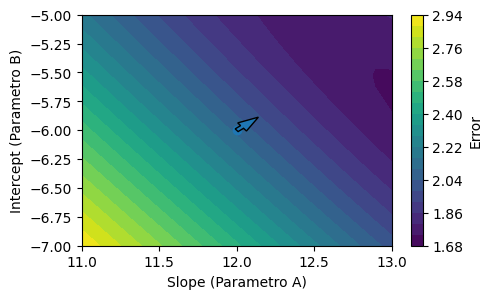

In [27]:
plot_local_error(model, x, y)
# Plota uma seta na direção do gradiente, lr (learning rate) define o comprimento da seta
# em relação ao comprimento original do gradiente. 
# Porém, tanto o gradiente de A quanto o gradiente de B possuem valores em direção aos maiores erros.
# Se invertermos os sinais de ambos, conseguimos ir em direção aos erros menores.
# Ou seja, se invertemos o sinal, estaremos indo em direção aos menores valores de gradiente, logo, temos os parametros mais otimizados ao erro.
lr = 0.01
plt.arrow(model.a, model.b, -lr*grad[0], -lr*grad[1], width=0.03)

Gradiente A: -2.91064176541568
Gradiente B: -2.3017852180480007
Parametro A após a descida 12.256623750616626
Parametro B após a descida -5.79484059127808
A vals [11.14019808 11.24546124 11.3507244  11.45598755 11.56125071 11.66651387
 11.77177703 11.87704019 11.98230334 12.0875665  12.19282966 12.29809282
 12.40335597 12.50861913 12.61388229 12.71914545 12.82440861 12.92967176
 13.03493492 13.14019808]
B vals [-6.886912   -6.78164884 -6.67638568 -6.57112253 -6.46585937 -6.36059621
 -6.25533305 -6.15006989 -6.04480674 -5.93954358 -5.83428042 -5.72901726
 -5.62375411 -5.51849095 -5.41322779 -5.30796463 -5.20270147 -5.09743832
 -4.99217516 -4.886912  ]


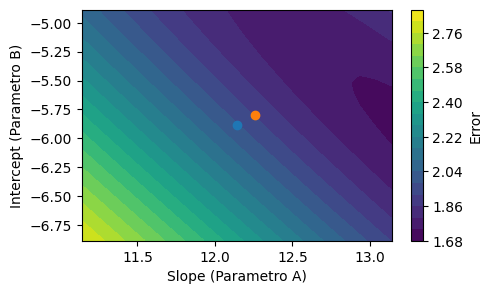

In [30]:
def step(model, x, y, lr):
    """Dá um passo de gradiente descendente. Os parâmetros do modelo
    são modificados in-place."""

    grad = mse_grad(model, x, y)
    # Modifica os parâmetros na direção contrária do gradiente
    model.a = model.a - lr*grad[0]
    model.b = model.b - lr*grad[1]

    print(f'Parametro A após a descida {model.a}')
    print(f'Parametro B após a descida {model.b}')

# Copia modelo original para plotar
model_or = model.copy()

step(model, x, y, lr=0.04)
plot_local_error(model_or, x, y)
plt.scatter(model.a, model.b)

Vamos tentar dar um passo um pouco maior

Gradiente A: -2.91064176541568
Gradiente B: -2.3017852180480007
Parametro A após a descida 12.809645686045606
Parametro B após a descida -5.357501399848959
A vals [ 9.14019808  9.45598755  9.77177703 10.0875665  10.40335597 10.71914545
 11.03493492 11.3507244  11.66651387 11.98230334 12.29809282 12.61388229
 12.92967176 13.24546124 13.56125071 13.87704019 14.19282966 14.50861913
 14.82440861 15.14019808]
B vals [-8.886912   -8.57112253 -8.25533305 -7.93954358 -7.62375411 -7.30796463
 -6.99217516 -6.67638568 -6.36059621 -6.04480674 -5.72901726 -5.41322779
 -5.09743832 -4.78164884 -4.46585937 -4.15006989 -3.83428042 -3.51849095
 -3.20270147 -2.886912  ]


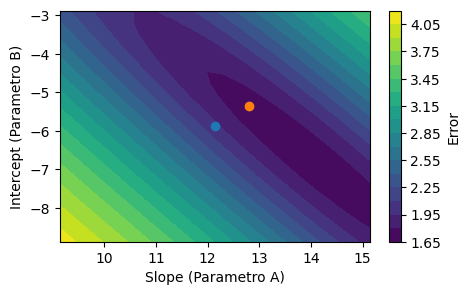

In [31]:
model = model_or.copy()

step(model, x, y, lr=0.23)
plot_local_error(model_or, x, y, par_range=3)
plt.scatter(model.a, model.b)

Vamos dar mais um passo usando gradiente descendente

Gradiente A: -0.09539769920366752
Gradiente B: 0.1859049525978218
Parametro A após a descida 13.286634182063944
Parametro B após a descida -6.287026162838068
A vals [ 9.14019808  9.45598755  9.77177703 10.0875665  10.40335597 10.71914545
 11.03493492 11.3507244  11.66651387 11.98230334 12.29809282 12.61388229
 12.92967176 13.24546124 13.56125071 13.87704019 14.19282966 14.50861913
 14.82440861 15.14019808]
B vals [-8.886912   -8.57112253 -8.25533305 -7.93954358 -7.62375411 -7.30796463
 -6.99217516 -6.67638568 -6.36059621 -6.04480674 -5.72901726 -5.41322779
 -5.09743832 -4.78164884 -4.46585937 -4.15006989 -3.83428042 -3.51849095
 -3.20270147 -2.886912  ]


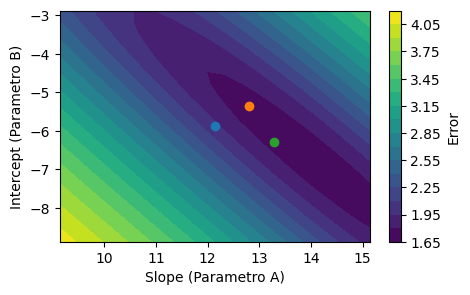

In [ ]:
model_1_step = model.copy() 
step(model, x, y, lr=5)

plot_local_error(model_or, x, y, par_range=3)
plt.scatter(model_1_step.a, model_1_step.b)
plt.scatter(model.a, model.b)

### Criando um loop de treinamento

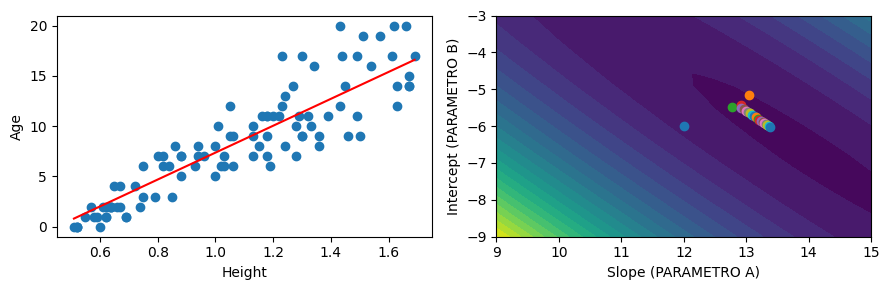

CPU times: total: 2.25 s
Wall time: 2.31 s


In [35]:
%%time
from IPython import display


def plot_figure(model, x, y, fig=None):

    # Aplica o modelo para valores entre x.min() e x.max()
    xm = np.linspace(x.min(), x.max())
    ym = model(xm)

    if fig is None:
        error_grid, a_vals, b_vals = get_local_error(model, x, y, par_range=3)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))
        # Plot 1
        ax1.scatter(x, y)
        ax1.plot(xm, ym, color="r")
        ax1.set_xlabel("Height")
        ax1.set_ylabel("Age")
        # Plot 2
        ax2.contourf(a_vals, b_vals, error_grid, levels=20)
        ax2.scatter(model.a, model.b)
        ax2.set_xlabel("Slope (PARAMETRO A)")
        ax2.set_ylabel("Intercept (PARAMETRO B)")
        plt.tight_layout()
        plt.close()
    else:
        # Atualiza somente a linha do plot 1 e os pontos do plot 2
        ax1, ax2 = fig.axes
        ax1.lines[0].set_data(xm, ym)
        ax2.scatter(model.a, model.b)

    # Remove o plot anterior
    display.clear_output(wait=True) 
    display.display(fig)
    
    return fig

def train(model, x, y, lr, num_epochs):

    fig = plot_figure(model, x, y)

    for epoch in range(0, num_epochs):
        step(model, x, y, lr)
        plot_figure(model, x, y, fig)

model = Model(a=12, b=-6)
num_epochs = 20
lr = 0.3
train(model, x, y, lr, num_epochs)

### Regressão linear com duas variáveis

Quando os valores de entrada possuem duas variáveis, também temos um problema de regressão linear. Vamos utilizar o modelo

$$
y_m = w_1x_1 + w_2x_2 + b
$$

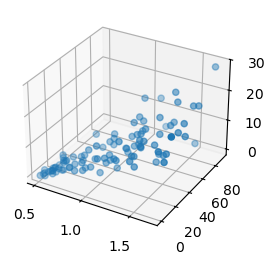

In [25]:
data = np.loadtxt("../data/age_data_2.txt")
x1, x2, y = data.T

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x1, x2, y)

Text(0.5, 0, 'Age')

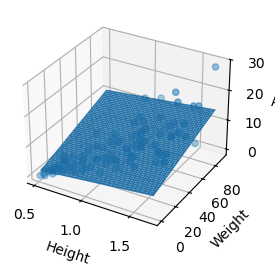

In [26]:
# Descomente para criar uma figura interativa
#%matplotlib widget
class Model:
    """Modelo linear de dois pesos e um bias."""

    def __init__(self, w1, w2, b):

        self.w1 = w1
        self.w2 = w2
        self.b = b

    def __call__(self, x1, x2):
        y = self.w1*x1 + self.w2*x2 + self.b
        return  y

model = Model(w1=3., w2=0.1, b=0)
x1m, x2m = np.meshgrid(
    np.linspace(x1.min(), x1.max()),
    np.linspace(x2.min(), x2.max())
    )
ym = model(x1m, x2m)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x1, x2, y)
ax.plot_surface(x1m, x2m, ym)
ax.set_xlabel("Height")
ax.set_ylabel("Weight")
ax.set_zlabel("Age")

A otimização será exatamente igual à realizada acima. A única diferença é que teremos um parâmetro a mais para otimizar:

In [27]:
def mse(model, x1, x2, y):

    ym = model(x1, x2)
    error = np.mean((y-ym)**2)

    return error

def mse_grad(model, x1, x2, y):

    n = len(x1)
    ym = model(x1, x2)
    gw1 = -2*np.sum((y-ym)*x1)/n
    gw2 = -2*np.sum((y-ym)*x2)/n
    gb = -2*np.sum(y-ym)/n

    return gw1, gw2, gb

def step(model, x1, x2, y, lr):

    grad = mse_grad(model, x1, x2, y)
    model.w1 = model.w1 - lr*grad[0]
    model.w2 = model.w2 - lr*grad[1]
    model.b = model.b - lr*grad[2]

    return model